In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

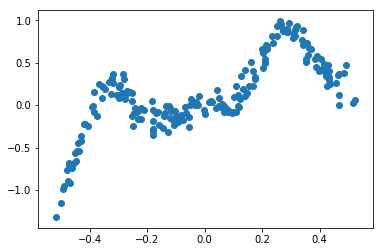

In [5]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y)

In [4]:
# xx = np.linspace(min(x), max(x), num=200)

## Non Residual Network

In [10]:
optimizer = tnn.Adam(learning_rate=0.01)
net1 = tnn.AutoForm(new_layers=True)

bias = tnn.BiasLayer(1, optimizer=optimizer)
linear = tnn.WeightsLayer(1, 1,optimizer=optimizer)
drelu1 = tnn.Relu()
bias2 = tnn.BiasLayer(1, optimizer=optimizer)
# linear.weights = np.zeros_like(linear.weights)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(xx)
    
    loss = tnn.MseLoss.loss(a1, yy)
    dy = tnn.MseLoss.del_loss(a1, yy)
    
#     dx = net1.backward((np.sign(dy))*dy**2)
    dx = net1.backward(dy)
    
    
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.05759794701073169

_______________________
epoch 100
Loss 0.05011136107195468

_______________________
epoch 200
Loss 0.050111304552634586

_______________________
epoch 300
Loss 0.050111323520785865

_______________________
epoch 400
Loss 0.05011130834033722

_______________________
epoch 500
Loss 0.050111318043972786

_______________________
epoch 600
Loss 0.05011133041677704

_______________________
epoch 700
Loss 0.050111313817790305

_______________________
epoch 800
Loss 0.0501113215694056

_______________________
epoch 900
Loss 0.050111353088601256


TclError: invalid command name "pyimage75"

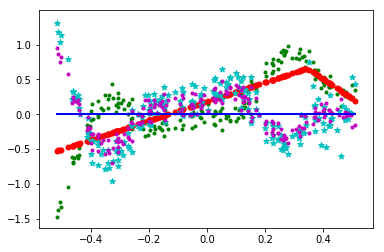

In [17]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

(array([0.33583586]), array([0.66549928]))

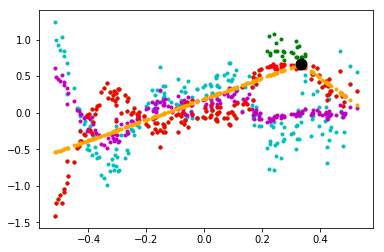

In [10]:
x_new = x_data.copy()
for i in range(1000):
    a1_ = net1.forward(x_new)
    loss_ = tnn.MseLoss.loss(a1_, y_data)
    dy_ = tnn.MseLoss.del_loss(a1_, y_data)
#     dx_ = net1.backward((np.sign(dy_))*dy_**2)
    dx_ = net1.backward(dy_)
    x_new = x_new - 0.1*dx_
    
    
    
a1_ = net1.forward(x_new)
dx_ = x_data - x_new
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, dx, marker='.', c='c', label='x,dx_')
plt.scatter(x, dx_.reshape(-1), marker='.', c='m', lw=1, label='x,dx_')
plt.scatter(x, a1_.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, a1.reshape(-1), marker='.', c='orange', lw=1, label='x,a1')



plt.scatter([-bias.bias], [linear.bias], color='black', lw=6)
-bias.bias, linear.bias

(0.012658521645964996, 0.04745053623800127, 0.04084005346551438)

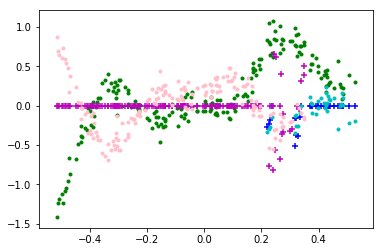

In [11]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
mask = drelu1.x >= 0.
plt.scatter(x[mask.reshape(-1)], bias.del_output[mask], marker='+', c='b', label='x,da1')
plt.scatter(x[~mask.reshape(-1)], bias.del_output[~mask], marker='+', c='m', label='x,da1')
plt.scatter(x[mask.reshape(-1)], dy[mask], marker='.', c='c', label='x,a1')
plt.scatter(x[~mask.reshape(-1)], dy[~mask], marker='.', c='pink', label='x,a1')
error1 = tnn.MseLoss().loss(a1[mask], y_data[mask])
error2 = tnn.MseLoss().loss(a1[~mask], y_data[~mask])
error1, error2, loss

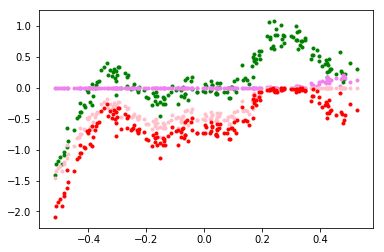

In [12]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, linear.input[:,0], marker='.', c='violet', label='x,a1')
plt.scatter(x, linear.input[:,1], marker='.', c='pink', label='x,a1')
plt.scatter(x, linear.zee-linear.bias, marker='.', c='r', label='x,a2')

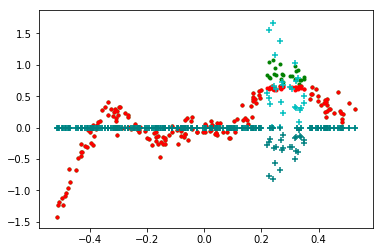

In [14]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
# plt.scatter(x, linear.input[:,0], marker='.', c='violet', label='x,a1')
# plt.scatter(x, linear.input[:,1], marker='.', c='pink', label='x,a1')
plt.scatter(x, linear.zee, marker='.', c='r', label='x,a2')
plt.scatter(x, drelu1.del_output[:,0], marker='+', c='c', label='x,da1')
plt.scatter(x, drelu1.del_output[:,1], marker='+', c='teal', label='x,da1')